# ch5. 서포트 벡터 머신 (Support Vector Machines, SVM)
- 선형/비선형 분류, 회귀, 이상치 탐색 등에 사용 가능한 다목적 머신러닝 모델
- 특히, 복잡한 분류 문제에 적합

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 5.1 선형 SVM 분류 (Linear SVM Classification)

- 기본 아이디어
    - 결정 경계를 적절히 설정해야 클래스가 잘 구분되고 일반화가 잘 됨
    - 라진 마진 분류(Large Margin Classification) : 클래스 사이에 가장 폭이 넓은 도로를 찾는 것
        - 마진(margin) : 클래스를 구분하는 도로의 경계
        
---
- 서포트 벡터 (Support Vector)
    - 도로의 양쪽 경계에 위치한 샘플
    - 서포트 벡터 바깥쪽에 훈련 샘플 추가해도 결정 경계에 영향 X
    - 서포트 벡터 사이의 **간격(도로의 폭)이 최대가 되도록 학습**

##### 📊 [그림 5-1] 라지 마진 분류 시각화

1. 대상을 정해 svm 모델 훈련시키기
    - 붓꽃 데이터셋의 세토사&버시컬러 품종 (버지니카 제외)
    - 특성: 꽃잎 길이&너비

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]                #꽃잎 길이(2) & 너비(3) 특성
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1) #세토사(0) & 버시컬러(1)

#setosa_or_versicolor에서 True 인 행만 뽑아 갱신
X = X[setosa_or_versicolor]                
y = y[setosa_or_versicolor]

#선형 SVM 분류 모델
svm_clf = SVC(kernel="linear",) #C=무한대 -> 즉, 하드 마진 분류
svm_clf.fit(X, y)

SVC(kernel='linear')

2. 학습된 모델을 그래프로 시각화하는 함수를 정의

In [3]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]      #결정 경계 파라미터 (wo,w1)
    b = svm_clf.intercept_[0] #절편(bias)
    
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1] #결정 경계
    
    margin = 1/w[1]                          #도로 폭
    gutter_up = decision_boundary + margin   #도로 경계(위쪽)
    gutter_down = decision_boundary - margin #도로 경계(아래쪽)
    
    #서포트 벡터
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    
    
    plt.plot(x0, decision_boundary, "k-", linewidth=2) #결정 경계
    plt.plot(x0, gutter_up, "k--", linewidth=2)        #도로 경계
    plt.plot(x0, gutter_down, "k--", linewidth=2)      #도로 경계

3. SVM 분류기로 만든 결정 경계 시각화 (라지 마진 분류)

Saving figure large_margin_classification_plot


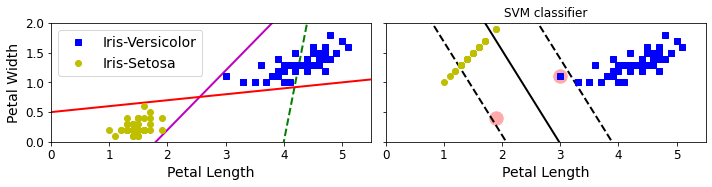

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

#Bad models (왼쪽)
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])


#Good models (오른쪽)
plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 0][y==0], "yo")
plt.xlabel("Petal Length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.title("SVM classifier")

save_fig("large_margin_classification_plot")
plt.show()

> `plt.sca()` : set current axis의 약자. 어떤 subplot을 작업할건지를 설정하는 함수.
> - (오른쪽) SVM 분류기의 결정 경계 - 라지 마진 분류 형태 : 두 클래스로부터 가장 멀리 떨어짐

##### 📊 [그림 5-2] SVM 모델이 스케일에 민감하다는 걸 보여주는 그래프

Saving figure sensitivity_to_feature_scales_plot


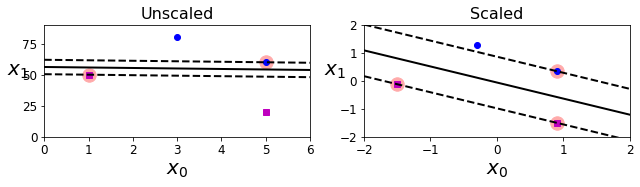

In [40]:
#학습 데이터 4개
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

#SVM 훈련
svm_clf = SVC(kernel="linear", C=100) #마진을 조금 허용(C=100)
svm_clf.fit(Xs, ys)

#(왼)스케일되지 않음
plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

#(오른)스케일됨: StandardScaler 사용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")  #버시컬러(파랑)
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")  #세토사(분홍)
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")

### 5.1.1) 소프트 마진 분류
1. `하드 마진 분류` (Hard Margin Classification)
- 모든 샘플이 도로 바깥쪽에 올바르게 분류
- 문제점
    - 훈련 데이터가 **선형적으로 구분**된 경우에만 가능
    - **이상치**에 민감 -> 일반화가 잘 안됨

=> 유연한 모델이 필요

---
2. `소프트 마진 분류` (Soft Margin Classification)
- 마진 오류(margin violation) 사이의 적절한 균형을 잡으면서 & 도로의 폭 최대로 넓게 유지
    - 마진 오류 : 훈련 샘플이 도로 상에 위치 Or 결정 경계를 넘어 해당 클래스 반대편에 위치

📢 `"C"` (SVM 모델의 하이퍼파라미터 중 하나)
1. C를 낮게 > 폭이 넓어짐 -> 마진 오류⬆️
    - C가 낮아질수록 규제가 커짐 (과대적합 방지)
    <br>
    <br>
2.  C를 높게 > 폭이 좁아짐 -> 마진 오류⬇️

##### 📊 [그림 5-3] 하드 마진의 문제점을 시각화

In [41]:
#이상치 심어놓기
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

#왼쪽 그림
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)

#오른쪽 그림
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

> `np.concatenate` : 두 개의 배열을 연결
    >> `axis=0`: 수직 방향으로 -> 위아래로 연결

Saving figure sensitivity_to_outliers_plot


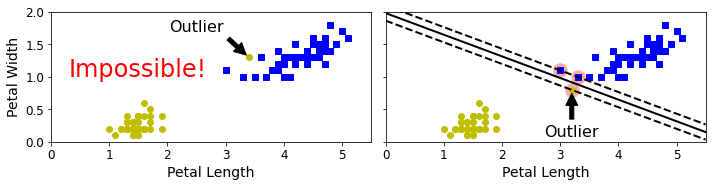

In [46]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

#(왼)하드 마진 불가능
plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")  #클래스 1에 해당 (파랑)
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")  #클래스 0에 해당 (노랑)
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.annotate("Outlier",                                      #주석을 표시할 텍스트
             xy=(X_outliers[0][0], X_outliers[0][1]),        #주석의 시작점(첫번째 이상치 좌표)
             xytext=(2.5, 1.7),                              #텍스트 위치
             ha="center",                                    #텍스트의 수평 정렬(가운데 정렬)
             arrowprops=dict(facecolor='black', shrink=0.1), #화살표의 속성 지정
             fontsize=16,
             )
plt.axis([0, 5.5, 0, 2])


#(오른)좋지 않은 하드 마진 분류
#SVC와 linear 커널 사용
svm_clf2 = SVC(kernel="linear", C=10*9) #C를 매우 크게 => 마진 매우 작게 설정(하드마진)
svm_clf2.fit(Xo2, yo2)

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal Length", fontsize=14)
plt.annotate("Outlier",                               
             xy=(X_outliers[1][0], X_outliers[1][1]), 
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

> `plt.annotate()` : 그림에 주석을 추가하는 함수. 특정 지점에 화살표와 텍스트를 표시할 때 사용

##### 📚 선형 소프트 마진 분류 학습
- 마진 오류를 어느 정도 허용

#### 선형 SVM 이진 분류 모델 `LinearSVC`  사용
- 타깃: 버지니카 품종 (양성 1, 음성 0)

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64) #버지니카 품종만

svm_clf = Pipeline([
            ("scaler", StandardScaler()),
             ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
        ])

svm_clf.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

> `LinearSVC` 모델 파라미터
>>- `C=1`: 디폴트값
>>- `logss=hinge`: hinge 손실 함수 사용
>>- `dual=True` : 쌍대성(duality) 이용 여부 설정. True가 디폴트. but) 특성 수<샘플 수 일 때는 False 권장

In [48]:
#길이가 5.5, 너비가 1.7인 샘플의 품종은?

svm_clf.predict([[5.5, 1.7]])

array([1.])

> 양성이다(1) = "버지니카"이다

##### 📊 [그림 5-4] 소프트 마진 분류에 사용되는 하이퍼파라미터 "C"에 따라 달라지는 모델 
- C⬇️ => 규제⬆️
- `C=float("inf")`: 디폴트값(무한대) -> 마진 허용X (하드 마진 분류)

In [49]:
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

#StandardScaler 사용
scaler = StandardScaler()

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])

scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
])

#훈련
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [51]:
# 축척이 조정되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])  # 절편
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])  # 절편
w1 = svm_clf1.coef_[0] / scaler.scale_                            # 기울기 파라미터
w2 = svm_clf2.coef_[0] / scaler.scale_                            # 기울기 파라미터

# 새로운 파라미터와 편향 지정
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기: libsvm과 달리 liblinear 라이브러리에서 제공되지 않기에 직접 넣어줌.
# 부울 인덱싱을 이용하여 결정경계 도로 안에 위치한 값들을 서포트 벡터로 지정함.
t = y * 2 - 1                                               # +1, -1 값
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()   # 결정경계 +- 1 안에 있는 데이터
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()   # 결정경계 +- 1 안에 있는 데이터
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Saving figure regularization_plot


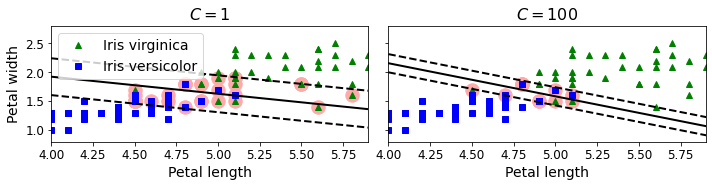

In [52]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

# 왼편 그림: svm_clf1 모델
plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

# 오른편 그림: svm_clf2 모델
plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")